In [33]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize

"""
The following is a simple constrained minimization problem.

The scipy.optimize.minimize function can take equality and inequality constraints.

The equality and inequality constraints are represented by f(x)=0 and f(x)>0, respectively.

obj: x**2+y

s.t.

2*x - y = 0

x + y + 1 > 0

"""

def objective(X):
    x, y = X
    
    return x**2 + y

def eq(X):
    x, y = X
    return 2 * x - y

def ineq(X):
    x, y = X
    return x + y + 1

sol = minimize(objective, [1, -0.5], constraints=({'type': 'eq', 'fun': eq},
                                                  {'type': 'ineq', 'fun': ineq}))

sol

     fun: -1.0
     jac: array([-2.,  1.])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([-1.00000001, -2.00000001])

In [3]:
"""
Scipy uses SLSQP as the default solver for constrained optimization. 

Genetic optimization utilizes chaotic mutations which require a smooth loss function.

To accomplish this an L2 penalty (P1 & P2) is applied when the constraints are not met.

P1 * equality_constraint(x)**2 + P2 * min(0,inequality_constraint(x))**2

"""

def smooth_objective(X):
    x, y = X
    
    return (x**2 + y) + 10*eq(X)**2 + 10*min(0,ineq(X))**2

In [175]:
import numpy as np

"""
The search bound for the 1st generation can be defined explictly.
"""

pop_size = 10001
bounds = ((-5,5),(-5,5))

#actual solution
SOL = sol.x


X = [np.random.uniform(l,u,size=(1,101)) for l,u in bounds]
X = np.vstack(X)

In [176]:
"""
The best parameters are sorted from smallest to largest.

Should half of the population be removed?

Then the population is split into 1...n (best) and n+1...m (other)
"""

L = np.array([smooth_objective(X[:,i]) for i in range(X.shape[1])])

shift = np.argsort(L)

L = L[shift]
X = X[:,shift]

X = X[:,:X.shape[1] - X.shape[1]%2]

X_N = X[:,:X.shape[1]//2] 
X_M = X[:,X.shape[1]//2:]

In [177]:
from math import gamma

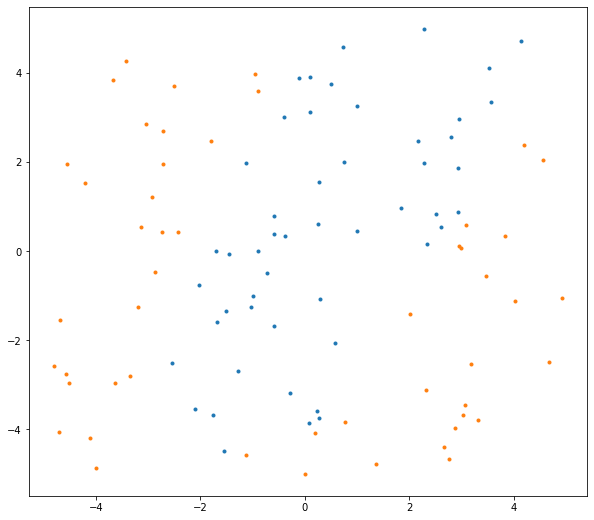

In [178]:
plt.figure(figsize=(10,9))
plt.plot(X_N[0],X_N[1],'.')
plt.plot(X_M[0],X_M[1],'.')

for i in range(3):
    
    
    BEST = X[:,0:1] 
    
    TOP_N_AVG = np.mean(X_N,axis=1)[:,np.newaxis]
    
    PAIR_DIFF = X_N - X_M
    
    DIRECTION_AVG = 1./3. * (TOP_N_AVG+BEST+X_N)
    
    DIRECTION_DEV = ((PAIR_DIFF)/12)**2 + 1e-9
    
    BEST_DEV = ((BEST-TOP_N_AVG)/12)**2 + 1e-9
    
    size = X.shape[1]//2
    
#     Y_N = np.vstack([np.random.normal(DIRECTION_AVG[j],DIRECTION_DEV[j],size=(1,size)) for j in range(X.shape[0])])



    

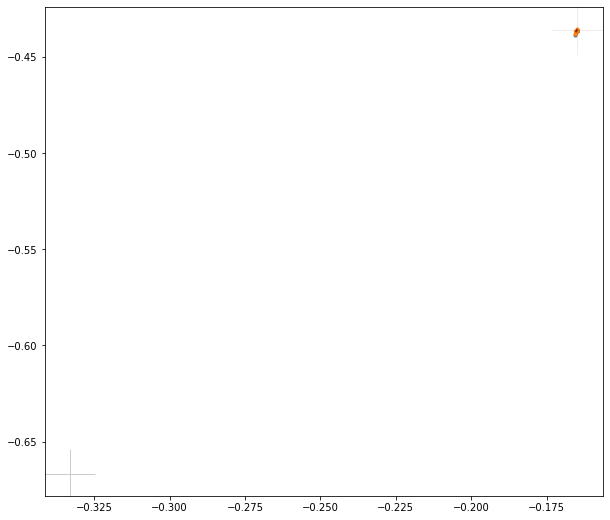

iteration 0 minimum loss -0.29596882548828146


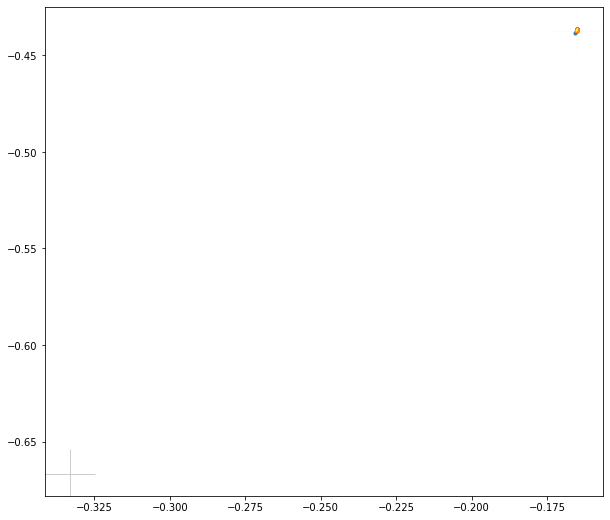

iteration 1 minimum loss -0.29596923460818886


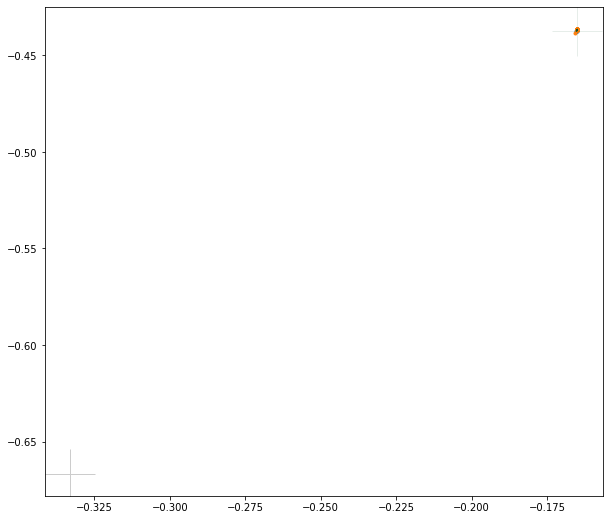

iteration 2 minimum loss -0.29596923460818886


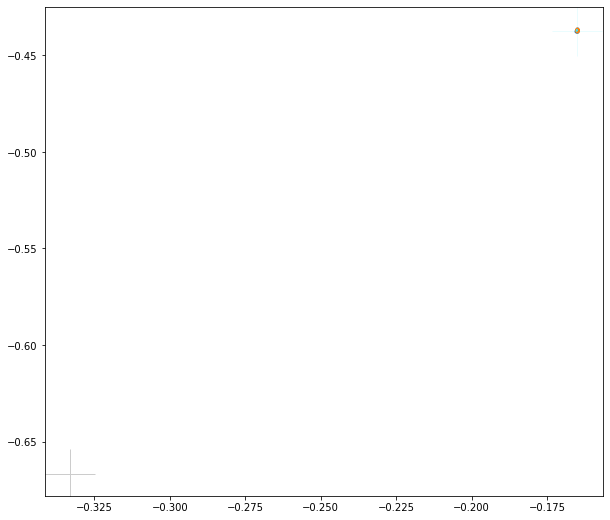

iteration 3 minimum loss -0.29596923460818886


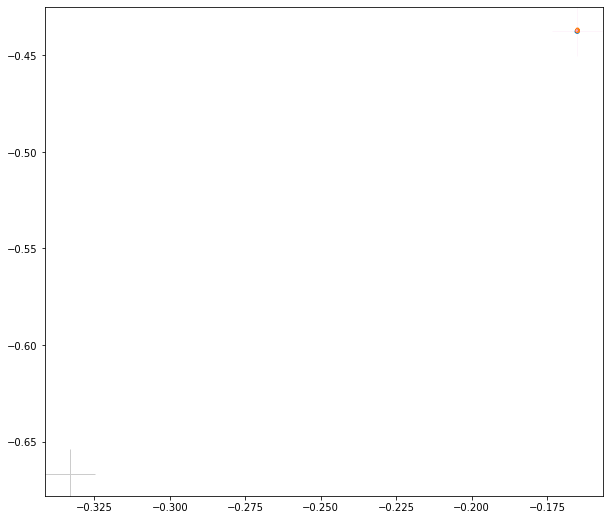

iteration 4 minimum loss -0.29596923460818886


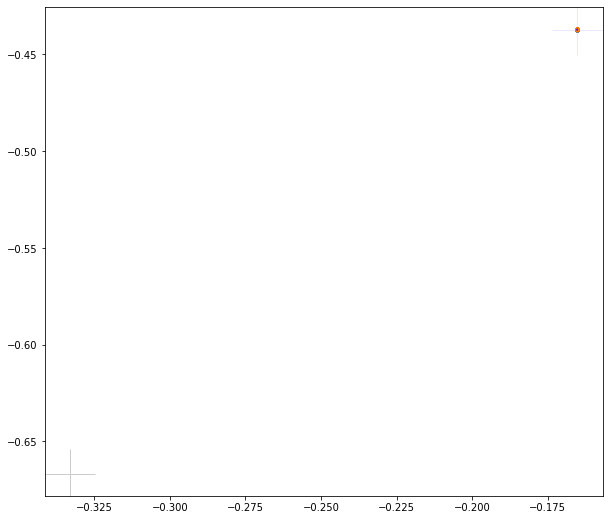

iteration 5 minimum loss -0.29596923460818886


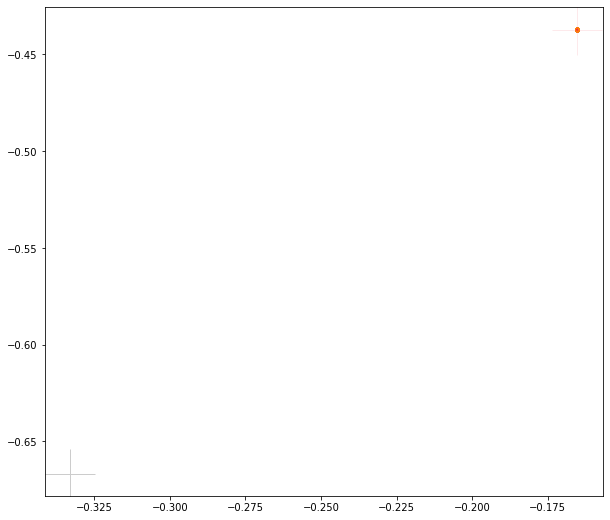

iteration 6 minimum loss -0.29596923460818886


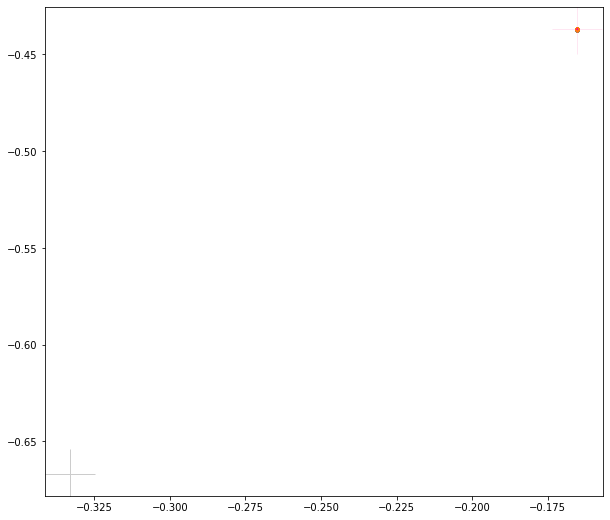

iteration 7 minimum loss -0.2959692650521485


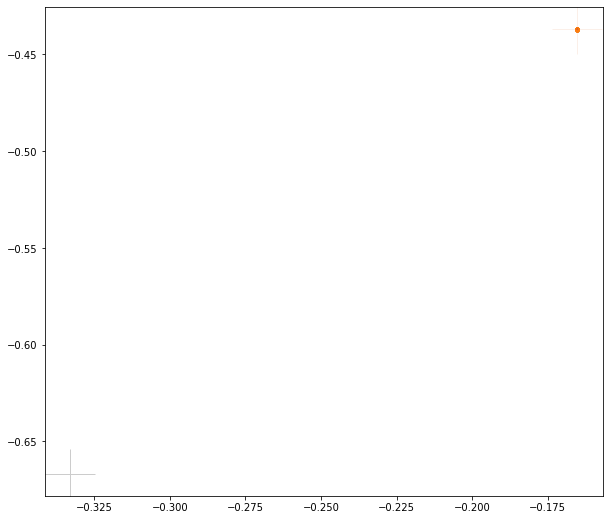

iteration 8 minimum loss -0.29596927099223447


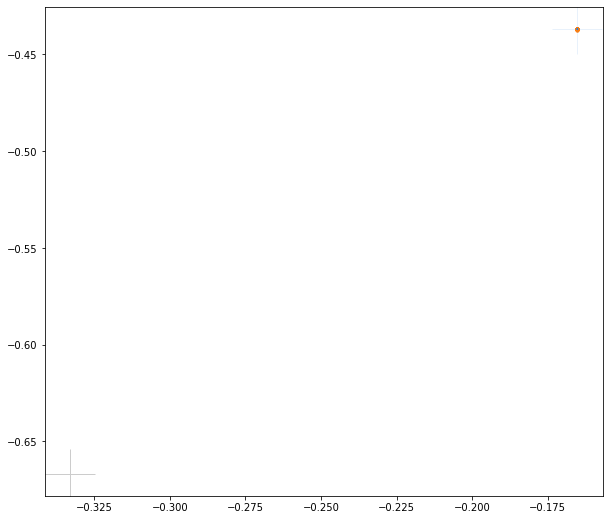

iteration 9 minimum loss -0.29596927232391834


In [181]:
DATA = []
for _ in range(10):

    MUT = np.zeros((X.shape[0],X.shape[1]//2))
        
    """
    The distribution based crossovers are created with directional components
    (1) - an average of the top N samples, TOP_N_AVG
    (2) - the current best sample, BEST
    (3) - an average of (1),(2), and the ith sample of the top N samples, X_N[:,i]

    (2) defined the center of a normal distribution crossover operation.
    The variation around this point is defined by the uniform variation between (1) and (2)

    (3) defined the center of a normal distribution crossover operation.
    The variation around this point is defined by the uniform variation between
    X_N[:,i] and X_M[:,i].

    (2) defined the initial point of a uniform distribution crossover.
    The point is shifted in a randomly in the direction between X_N[:,i]-X_M[:,i]

    (3) defined the initial point of a uniform distribution crossover.
    The point is shifted in a randomly in the direction between (2)-(3)


    Different mutation operators are used depending on the iteration
    1 - Cauchy mutation operator
    2 - normal mutation operator
    3 - levy flight mutation operator https://arxiv.org/pdf/1303.6342.pdf
    """

    BEST = X[:,0:1] 
    
    DATA.append(X[:,0:1])
    
    TOP_N_AVG = np.mean(X_N,axis=1)[:,np.newaxis]
    
    PAIR_DIFF = X_N - X_M
    
    DIRECTION_AVG = 1./3. * (TOP_N_AVG+BEST+X_N)
    
    DIRECTION_DEV = ((PAIR_DIFF)/12)**2 + 1e-9
    
    BEST_DEV = ((BEST-TOP_N_AVG)/12)**2 + 1e-9
    
    size = X.shape[1]//2
    
    Y_N = np.vstack([np.random.normal(DIRECTION_AVG[j],DIRECTION_DEV[j],size=(1,size)) for j in range(X.shape[0])])

#     Y_M = np.vstack([np.random.normal(BEST[j],BEST_DEV[j],size=(1,size)) for j in range(X.shape[0])])

#     Y_K = BEST + np.random.uniform(0,1,size=(X.shape[0],size))*PAIR_DIFF

#     Y_L = DIRECTION_AVG + np.random.uniform(0,1,size=(X.shape[0],size))*(BEST-DIRECTION_AVG)
    
#     iters = np.arange(X.shape[1]//2)
#     Z_CAUCHY = X_N[:,iters % 3 == 0]+ X_N[:,iters % 3 == 0]*np.random.standard_cauchy(size=(np.sum(iters % 3 == 0)))
#     MUT[:,iters % 3 == 0] = Z_CAUCHY

#     NORM_MUT_DEV = ((BEST-X_N[:,iters % 3 == 1])/12)**2 + 1e-9
#     Z_NORM = np.random.normal(BEST,NORM_MUT_DEV,size=(np.sum(iters % 3 == 1)))
#     MUT[:,iters % 3 == 1] = Z_NORM

#     lmbda = 1
#     LEVY_DEV = (gamma(1+lmbda)*np.sin(np.pi*lmbda/2)/(gamma((1+lmbda)/2)*lmbda*2**((lmbda-1)/2)))**(1/lmbda)
#     LEVY_U = np.random.normal(0,LEVY_DEV,size=(np.sum(iters % 3 == 0)))
#     LEVY_V = np.random.normal(0,1,size=(np.sum(iters % 3 == 0)))
#     Z_LEVY = X_N[:,iters % 3 == 0]+ 0.01*LEVY_U/(LEVY_V**(1/lmbda))
#     MUT[:,iters % 3 == 0] = Z_LEVY


#     X = np.hstack([X_N,Y_N,Y_M,Y_K,Y_L,MUT])
    X = np.hstack([X_N,Y_N])
    
    #drop duplicates (substitution and substitute with random)

    NUM = X.shape[1]
    
    X = np.unique(X, axis=1)
    
    if NUM-X.shape[1]>0:
        sample_size = NUM-X.shape[1]
        RAND = [np.random.uniform(l,u,size=(1,101)) for l,u in bounds]
        RAND = np.vstack(RAND)
        X = np.hstack([X,RAND])
    

    L = np.array([smooth_objective(X[:,i]) for i in range(X.shape[1])])

    shift = np.argsort(L)

    L = L[shift]
    X = X[:,shift]
    X = X[:,:1000]

    X = X[:,:X.shape[1] - X.shape[1]%2]

    X_N = X[:,:X.shape[1]//2] 
    X_M = X[:,X.shape[1]//2:]
    
    plt.figure(figsize=(10,9))
    plt.plot(X_N[0],X_N[1],'.')
    plt.plot(X_M[0],X_M[1],'.')

    for i in range(1):

        S = np.diag(DIRECTION_DEV[:,i])

        #create circle (points)
        z = np.arange(0,2*np.pi+np.pi/8,np.pi/8)
        points = np.array([[np.cos(z[i]),np.sin(z[i+1])] for i in range(z.shape[0]-1)])
        points = np.concatenate([points,points[:1]])

        #1 std away
        T = (S*3)
    #     print(T)

        c = np.random.rand(3,)
        points = points.dot(T)
        points[:,0] = points[:,0]+DIRECTION_AVG[0,i]
        points[:,1] = points[:,1]+DIRECTION_AVG[1,i]
#         plt.plot(points[:,0],points[:,1],c=c)

        plt.plot([-0.333],[-0.6666],'+',markersize=50,color='black',alpha=0.2)
        plt.plot([X_N[0,i]],[X_N[1,i]],'+',markersize=50,c=c,alpha=0.1)

        plt.plot([X_N[0,i],BEST[0],TOP_N_AVG[0],X_N[0,i]],[X_N[1,i],BEST[1],TOP_N_AVG[1],X_N[1,i]],c=c)

#         plt.plot([X_N[0,i],X_M[0,i]],[X_N[1,i],X_M[1,i]],c=c)

#         plt.plot([DIRECTION_AVG[0,i]],[DIRECTION_AVG[1,i]],'+',c=c)
    plt.show()

    print('iteration', _, 'minimum loss',np.min(L))



In [173]:
gen_sol = X[:,0]
gen_sol

array([0.57203723, 1.2066523 ])

In [27]:
list(map(lambda x: np.shape(x),[X_N,Y_N,Y_M,Y_K,Y_L,MUT]))

[(2, 50), (1, 100), (1, 100), (2, 50), (2, 50), (2, 50)]